# **Q1**

In [ ]:
import pandas as pd
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
df.drop('Price',axis=1,inplace=True)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df)
df_scaled

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462915, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

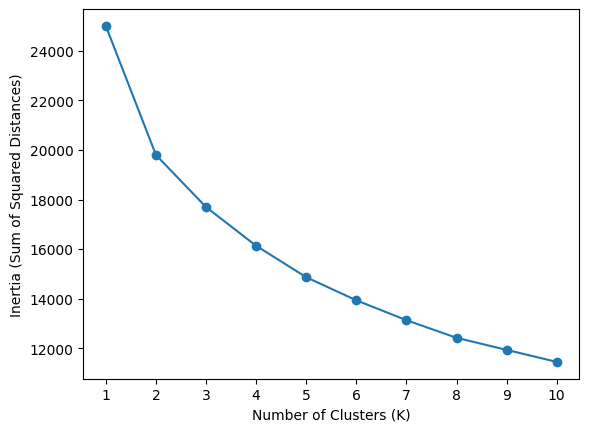

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1,11))
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

df['Cluster'] = kmeans.labels_

if df.shape[1] == 2:
    plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

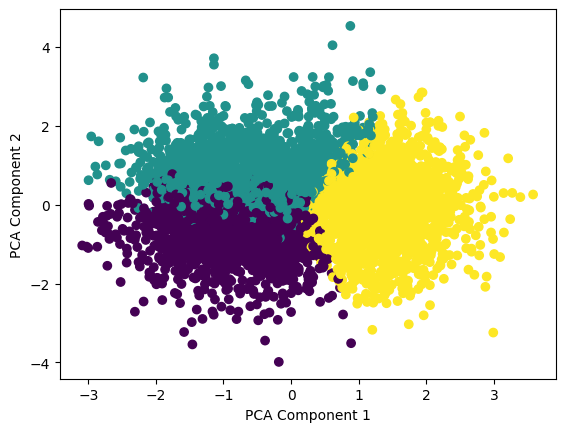

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

def _calculate_sse(self, X, labels, centroids):
        """
        Calculate the Sum of Squared Errors (SSE).
        """
        sse = 0
        for i in range(self.k):
            cluster_points = X[labels == i]
            sse += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1) ** 2)
        return sse

# **Q2**

In [ ]:
import numpy as np
import random
from collections import defaultdict
from sklearn.metrics.pairwise import pairwise_distances

class KMedoids:
    def __init__(self, k, max_iter=100):
        self.k = k  # Number of clusters
        self.max_iter = max_iter  # Maximum number of iterations

    def fit(self, X):
        """
        Fit the K-Medoids algorithm to the dataset X.

        :param X: A 2D numpy array where each row is a data point.
        """
        n = len(X)

        # Randomly initialize the medoids
        initial_medoids_idx = random.sample(range(n), self.k)
        self.medoids = X[initial_medoids_idx]

        for i in range(self.max_iter):
            # Step 1: Assign each point to the nearest medoid
            clusters = self._assign_points_to_medoids(X)

            # Step 2: Update medoids
            new_medoids = self._update_medoids(X, clusters)

            # Check for convergence (if medoids haven't changed)
            if np.array_equal(new_medoids, self.medoids):
                break

            self.medoids = new_medoids

        return self.medoids, clusters

    def _assign_points_to_medoids(self, X):
        """
        Assign each point in X to the nearest medoid.

        :param X: A 2D numpy array where each row is a data point.
        :return: A dictionary where keys are medoid indices, and values are lists of points in the cluster.
        """
        clusters = defaultdict(list)

        # Compute the pairwise distance matrix between points and medoids
        distances = pairwise_distances(X, self.medoids, metric='euclidean')

        # For each point, assign it to the closest medoid
        for idx, point in enumerate(X):
            closest_medoid_idx = np.argmin(distances[idx])
            clusters[closest_medoid_idx].append(idx)

        return clusters

    def _update_medoids(self, X, clusters):
        """
        Update the medoids by choosing the point with the minimum sum of distances to all points in the cluster.

        :param X: A 2D numpy array where each row is a data point.
        :param clusters: A dictionary with the points assigned to each medoid.
        :return: An updated list of medoids.
        """
        new_medoids = np.copy(self.medoids)

        for cluster_idx, points in clusters.items():
            # Calculate the distance matrix for the current cluster
            cluster_points = X[points]
            distances = pairwise_distances(cluster_points, metric='euclidean')

            # Find the point with the minimum sum of distances within the cluster
            min_distance_sum = np.inf
            new_medoid_idx = points[0]

            for i in range(len(points)):
            # Use the index i to iterate within the cluster points
              distance_sum = np.sum(distances[i, :])
            if distance_sum < min_distance_sum:
                min_distance_sum = distance_sum
                # Update the new medoid index within the original points list
                new_medoid_idx = points[i]

            new_medoids[cluster_idx] = X[new_medoid_idx]

        return new_medoids

    def _calculate_sse(self, X, labels, medoids):
        """
        Calculate the Sum of Squared Errors (SSE) for the medoids clustering.
        """
        sse = 0
        for i in range(self.k):
            cluster_points = X[labels == i]
            sse += np.sum(np.linalg.norm(cluster_points - medoids[i], axis=1) ** 2)
        return sse

# Example dataset (2D array)
data = df_scaled

# Number of clusters (K)
k = 2

# Apply K-Medoids
kmedoids = KMedoids(k)
medoids, clusters = kmedoids.fit(data)

print("Final Medoids:")
print(medoids)

print("\nClusters:")
for medoid_idx, points in clusters.items():
    print(f"Medoid {medoid_idx}: {data[medoid_idx]}")
    print("Cluster points:", data[points])
    print("="*40)

Final Medoids:
[[-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]]

Clusters:
Medoid 1: [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
Cluster points: [[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [-0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 [-0.80707253 -0.94483368  0.84674187  0.20151314 -0.98838741]
 ...
 [ 0.09909349 -0.9781662   0.78607707  1.67637503  1.80284432]
 [ 0.42017159 -0.68949904 -0.67168849  0.14478768 -1.35700608]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]]
Medoid 0: [ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
Cluster points: [[ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.49149907  1.22157207 -1.39307717 -0.58453963 -0.18673422]
 [-0.36451842  0.04853334  1.15335596 -0.46298508  2.4851974 ]
 ...
 [ 0.92973969  1.03082232 -0.40868634  0.03133676 -1.06274706]
 [-0.48723454  1.28447022 -2.1